# Insights from IMDB and Movie_Metadata Datasets

In [6]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

In [7]:
import itertools

In [8]:
df_i = pd.read_csv('..//Takeaway Assignment - R _ Python//imdb.csv',escapechar = "\\")
df_m = pd.read_csv('..//Takeaway Assignment - R _ Python//movie_metadata.csv')

In [9]:
#df = df_i
df = df_m

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5043 entries, 0 to 5042
Data columns (total 28 columns):
color                        5024 non-null object
director_name                4939 non-null object
num_critic_for_reviews       4993 non-null float64
duration                     5028 non-null float64
director_facebook_likes      4939 non-null float64
actor_3_facebook_likes       5020 non-null float64
actor_2_name                 5030 non-null object
actor_1_facebook_likes       5036 non-null float64
gross                        4159 non-null float64
genres                       5043 non-null object
actor_1_name                 5036 non-null object
movie_title                  5043 non-null object
num_voted_users              5043 non-null int64
cast_total_facebook_likes    5043 non-null int64
actor_3_name                 5020 non-null object
facenumber_in_poster         5030 non-null float64
plot_keywords                4890 non-null object
movie_imdb_link              5043 non-

In [11]:
df.shape

(5043, 28)

>The below histogram for duration tells us that the most movies are 100 - 130 minutes long.

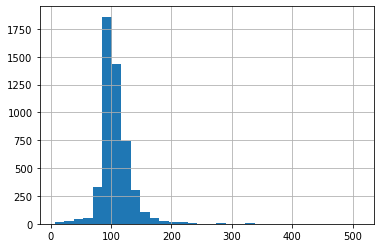

In [12]:
df.duration.hist(bins=32)

In [13]:
df_c = df[['content_rating','movie_title']].groupby('content_rating')['movie_title'].count().rename("title_count").reset_index()
df_c

,content_rating,title_count
0,Approved,55
1,G,112
2,GP,6
3,M,5
4,NC-17,7
5,Not Rated,116
6,PG,701
7,PG-13,1461
8,Passed,9
9,R,2118


>This tells us the most movies are rated Restricted (R) 

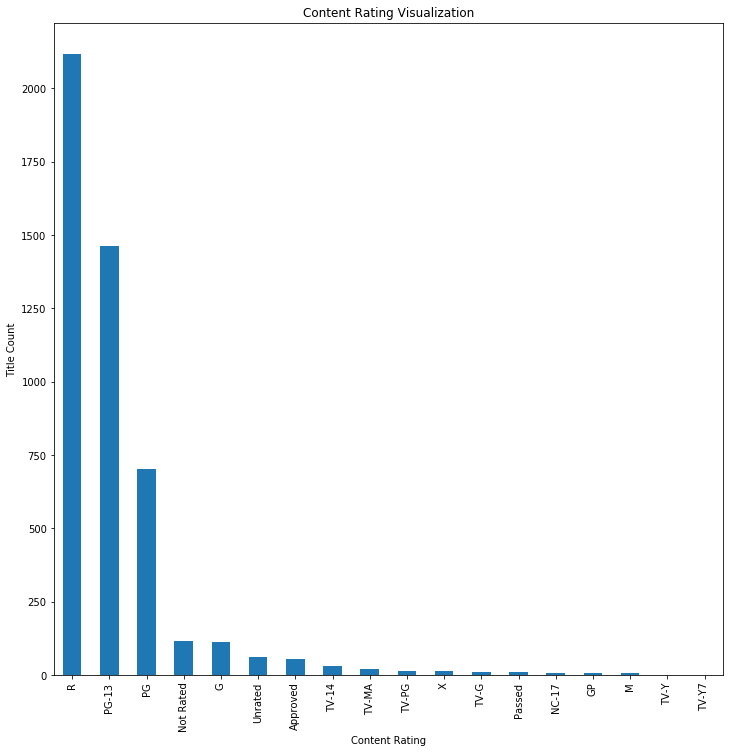

In [14]:
#Content Rating Visualization
df.content_rating.value_counts().plot(kind='bar',figsize=(12,12));
plt.xlabel('Content Rating')
plt.ylabel('Title Count')
plt.title('Content Rating Visualization')
plt.show()

>Below table show the top rated movie in each genre and genre combination

In [15]:
df.sort_values('imdb_score', ascending=False).groupby('genres')['movie_title','imdb_score'].first()

,movie_title,imdb_score
genres,,
Action,Kickboxer: Vengeance,9.1
Action|Adventure,Raiders of the Lost Ark,8.5
Action|Adventure|Animation|Comedy|Crime|Family|Fantasy,Osmosis Jones,6.2
Action|Adventure|Animation|Comedy|Drama|Family|Fantasy|Thriller,Alpha and Omega 4: The Legend of the Saw Tooth...,6.0
Action|Adventure|Animation|Comedy|Drama|Family|Sci-Fi,The Iron Giant,8.0
...,...,...
Sci-Fi|Thriller,Blade Runner,8.2
Thriller,Frenzy,7.5
Thriller|War,The Train,7.9


>This tells us that if the movie duration is below 130 minutes it’s more likely to receive a rating.

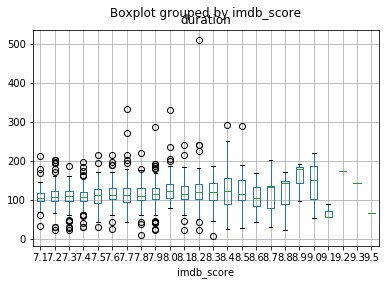

In [16]:
i = df[df['imdb_score'] > 7]
i.boxplot(column='duration', by='imdb_score')

>The amount of movies that were produced each year from 2001 to 2016

Text(0.5, 1.0, 'Movie Count by Year')

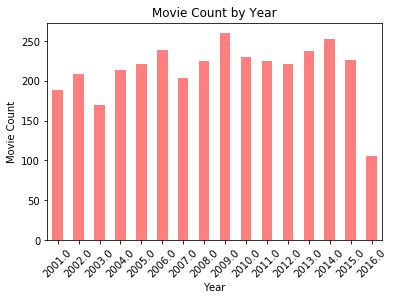

In [17]:
y = df[df['title_year'] > 2000]
movie_yearly_count = y['title_year'].value_counts().sort_index().plot(kind='bar', color='r', alpha=0.5, grid=False, rot=45)
movie_yearly_count.set_xlabel('Year')
movie_yearly_count.set_ylabel('Movie Count')
movie_yearly_count.set_title('Movie Count by Year')

In [18]:
unique_genres = df['genres'].unique()
individual_genres = []
for genre in unique_genres:
    individual_genres.append(genre.split('|'))

individual_genres = list(itertools.chain.from_iterable(individual_genres))
individual_genres = set(individual_genres)

> Percent of total entries attributed to each genre

In [19]:
genre_pcts = np.zeros(len(individual_genres))
i = 0
for genre in individual_genres:
    current_genre = y['genres'].str.contains(genre).fillna(False)
    pct = len(y[current_genre]) / 1000 * 100
    genre_pcts[i] = pct
    i += 1
    print(genre, pct)

Film-Noir 0.0
News 0.3
Biography 21.099999999999998
Horror 38.5
Sci-Fi 38.800000000000004
Thriller 97.1
Action 77.4
Animation 19.3
Family 39.900000000000006
Fantasy 40.2
Game-Show 0.0
Romance 74.2
War 13.100000000000001
Adventure 61.5
History 13.5
Reality-TV 0.0
Drama 172.8
Crime 57.599999999999994
Sport 13.200000000000001
Music 20.5
Musical 7.1
Short 0.4
Western 4.7
Comedy 128.4
Documentary 11.1
Mystery 35.3


In [20]:
genre_pcts_df = pd.DataFrame(genre_pcts, index=individual_genres, columns=['Percent'])
genre_pcts_df

,Percent
Film-Noir,0.0
News,0.3
Biography,21.1
Horror,38.5
Sci-Fi,38.8
Thriller,97.1
Action,77.4
Animation,19.3
Family,39.9
Fantasy,40.2


Text(0.5, 1.0, 'Percent of Total Movies Made from Top 5 Genres')

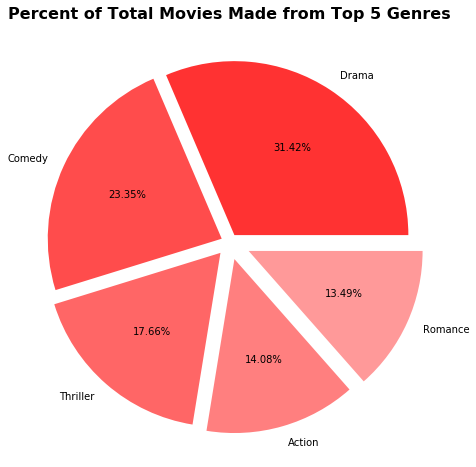

In [21]:
explode = (0.05, 0.05, 0.08, 0.1, 0.12)
colors = ['#ff3232', '#ff4c4c', '#ff6666', '#ff7f7f', '#ff9999', ]
genre_pcts_df.sort_values(by='Percent', ascending=False).head(5).plot.pie(legend=False, subplots=True, autopct='%.2f%%', figsize=(8,8), colors=colors, explode=explode)
plt.ylabel('')
plt.title('Percent of Total Movies Made from Top 5 Genres', weight='bold', fontsize=16)

> Top 10 directors in number of movies directed.

In [22]:
directors = df['director_name'].value_counts().head(10)
directors.reset_index()

,index,director_name
0,Steven Spielberg,26
1,Woody Allen,22
2,Martin Scorsese,20
3,Clint Eastwood,20
4,Ridley Scott,17
5,Tim Burton,16
6,Steven Soderbergh,16
7,Spike Lee,16
8,Renny Harlin,15
9,Oliver Stone,14


In [23]:
dir_rev = np.zeros(len(directors))
i = 0
for director in directors.index:
    current_director = df['director_name'].str.contains(director).fillna(False)
    director_film_revenue = df[current_director].xs('gross', axis=1).sum()
    dir_rev[i] = director_film_revenue
    i += 1
    print(director, director_film_revenue)

Steven Spielberg 4114233101.0
Woody Allen 308345443.0
Martin Scorsese 920287128.0
Clint Eastwood 1378321100.0
Ridley Scott 1337771688.0
Tim Burton 2071275480.0
Steven Soderbergh 1050729636.0
Spike Lee 328500427.0
Renny Harlin 523975947.0
Oliver Stone 679792713.0


In [24]:
dir_rev_df = pd.DataFrame(dir_rev, index = directors.index, columns=['Revenue (Dollars)'])
dir_rev_df

,Revenue (Dollars)
Steven Spielberg,4.114233e+09
Woody Allen,3.083454e+08
Martin Scorsese,9.202871e+08
Clint Eastwood,1.378321e+09
Ridley Scott,1.337772e+09
Tim Burton,2.071275e+09
Steven Soderbergh,1.050730e+09
Spike Lee,3.285004e+08
Renny Harlin,5.239759e+08
Oliver Stone,6.797927e+08


Text(0.5, 1.0, 'Most Active Directors Revenue Contribution')

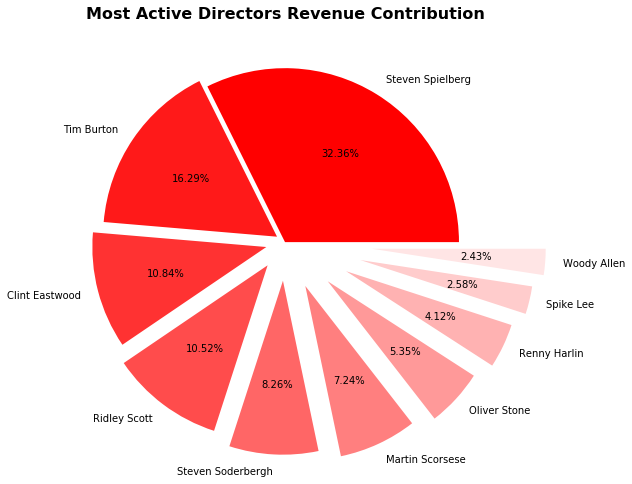

In [25]:
explode = np.linspace(0, 0.5, 10)
colors = ['#ff0000', '#ff1919','#ff3232', '#ff4c4c', '#ff6666', '#ff7f7f', '#ff9999', '#ffb2b2', '#ffcccc', '#ffe5e5', ]
dir_rev_df.sort_values(by='Revenue (Dollars)', ascending=False).plot.pie(legend=False, subplots=True, autopct='%.2f%%', figsize=(8,8), colors=colors, explode=explode)
plt.ylabel('')
plt.title('Most Active Directors Revenue Contribution', weight='bold', fontsize=16)

>
